In [1]:
import os
os.chdir('/home/lunar/Desktop/IgoR_crawling/CODE_Project/')
from load_data import *
from utils import *

import project_maintainment as main_pj
import project_results as res_pj

%matplotlib inline

This notebook demonstrates routine cource of comparative analysis of derived IGOR models from several projects.
Here we first combine multiple projects (IGOR intput data and infered models for different datasets) into one class object 'Multi', than output some combined VDJ probabilities from IGOR's models and finally investigate possibility to distinguish between two murine strands BALBC and C57BL based on recombination events probabilities.

Single Project, contatins utils to run IGOR's processes as well as paths to its outputs/inputs. 
Single Project  is supposed to include several batches from one dataset. Those batches may refer to samples from different
tissues or different animal strains. This object also includes a class for comparative analysis of VDJ event 
details between samples (batches) in single study.
Here we bundle several Projects into a single one (preserving their internal structure). 

In [2]:
### All you need to load preassembled projects is a link to core folder 
### and json file containing instructions how to find other files from it (assumes stringe structure of directories)
Primers = json.load(open('/home/lunar/Desktop/IgoR_crawling/projects/Primers.json', 'r'))
Core = '/home/lunar/Desktop/IgoR_crawling/projects/'
project_names = ['project_mouse_2', 'project_mouse_3', 'PD1_BALBC', 'project_mouse_memoryT', 'Immunized']
Multi_1 = main_pj.Multi(core=Core, primers=Primers, projects=project_names)
## Load 'Frame' Objects, containing 1) navigation between Inputs/Outputs/etc 2) Control_panel allowing to run IGOR
## on this data without specifying any paths - only batch names and parameters 3) Object for storage and analysing of 
## all results from this project
Multi_1.load_frames()

loading frame of project project_mouse_2
loading frame of project project_mouse_3
loading frame of project PD1_BALBC
loading frame of project project_mouse_memoryT
loading frame of project Immunized


In [3]:
Multi_1.load_results()

In [4]:
### Original names for projects can be change but than, you will have to make new Metadata file 
projects_alias = dict(zip(Multi_1.project_names,['Adaptive_Cntrl', 'Adult_embrions', 'PD1', 'MemoryT', 'CTLA4']))
Multi_1.projects_alias=projects_alias

In [5]:
### Here I included some trimming for batch names to make them look prettier and more informative (display purpouses)
Multi_1.make_batches_alias()

In [221]:
### combine results from two projects using original names for 'V-choice' probabilities
c1=Multi_1.combine_event_results('j_choice', project_names=['project_mouse_3', 'project_mouse_3'], alias=False )
print(c1.shape)
c1.head()

(14, 10)


,Adult_1_Out_x,Adult_2_Out_x,Adult_3_Out_x,Adult_4_Out_x,Adult_5_Out_x,Adult_1_Out_y,Adult_2_Out_y,Adult_3_Out_y,Adult_4_Out_y,Adult_5_Out_y
TRBJ2-1*01,0.114738,0.127787,0.122186,0.123021,0.123978,0.114738,0.127787,0.122186,0.123021,0.123978
TRBJ1-7*01,0.000000,0.000199,0.000000,0.000116,0.000077,0.000000,0.000199,0.000000,0.000116,0.000077
TRBJ2-6*01,0.000500,0.000597,0.000759,0.000408,0.000309,0.000500,0.000597,0.000759,0.000408,0.000309
TRBJ2-2*01,0.061261,0.064092,0.058437,0.063810,0.068431,0.061261,0.064092,0.058437,0.063810,0.068431
TRBJ2-5*01,0.098299,0.110196,0.086834,0.108316,0.104548,0.098299,0.110196,0.086834,0.108316,0.104548


In [7]:
### combine results from every project using alias batch-names for flattened and aggreagated conditional probabilities
c2=Multi_1.combine_event_results('flatten')
print(c2.shape)
c2.head()

(2154, 44)


,Adaptive|BALBC|18k,Adaptive|BALBC|18k,Adaptive|BALBC|18k,Adaptive|BALBC|18k,Adaptive|C57BL|18k,Adaptive|C57BL|18k,Adaptive|C57BL|18k,Adaptive|C57BL|18k,Adult_embrions|C57BL|12575,Adult_embrions|C57BL|5230,...,CTLA4|BALBC|358,CTLA4|BALBC|1266,CTLA4|C57BL|6104,CTLA4|C57BL|7902,CTLA4|BALBC|648,CTLA4|BALBC|438,CTLA4|BALBC|395,CTLA4|BALBC|991,CTLA4|BALBC|376,CTLA4|BALBC|717
0,0.072206,0.070900,0.062343,0.058656,0.043476,0.042574,0.033751,0.035385,0.066195,0.069865,...,0.053977,0.050251,0.048689,0.043009,0.081667,0.059666,0.023810,0.039530,0.051771,0.036550
1,0.000000,0.000000,0.000000,0.000000,0.000801,0.000575,0.000513,0.000912,0.000000,0.000000,...,0.008523,0.001675,0.000851,0.001710,0.000000,0.004773,0.000000,0.000000,0.000000,0.000000
2,0.080050,0.069809,0.068846,0.071071,0.024712,0.024303,0.022235,0.021197,0.068110,0.069467,...,0.031250,0.023451,0.025707,0.024990,0.018333,0.033413,0.015873,0.020299,0.029973,0.020468
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.051821,0.053505,0.048540,0.049146,0.000000,0.000000,0.000000,0.000000,0.047377,0.052548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [223]:
#Multi_1.combine_event_results('v_choice')

Text(0.5,1,'Pearsons correlation, v_choice')

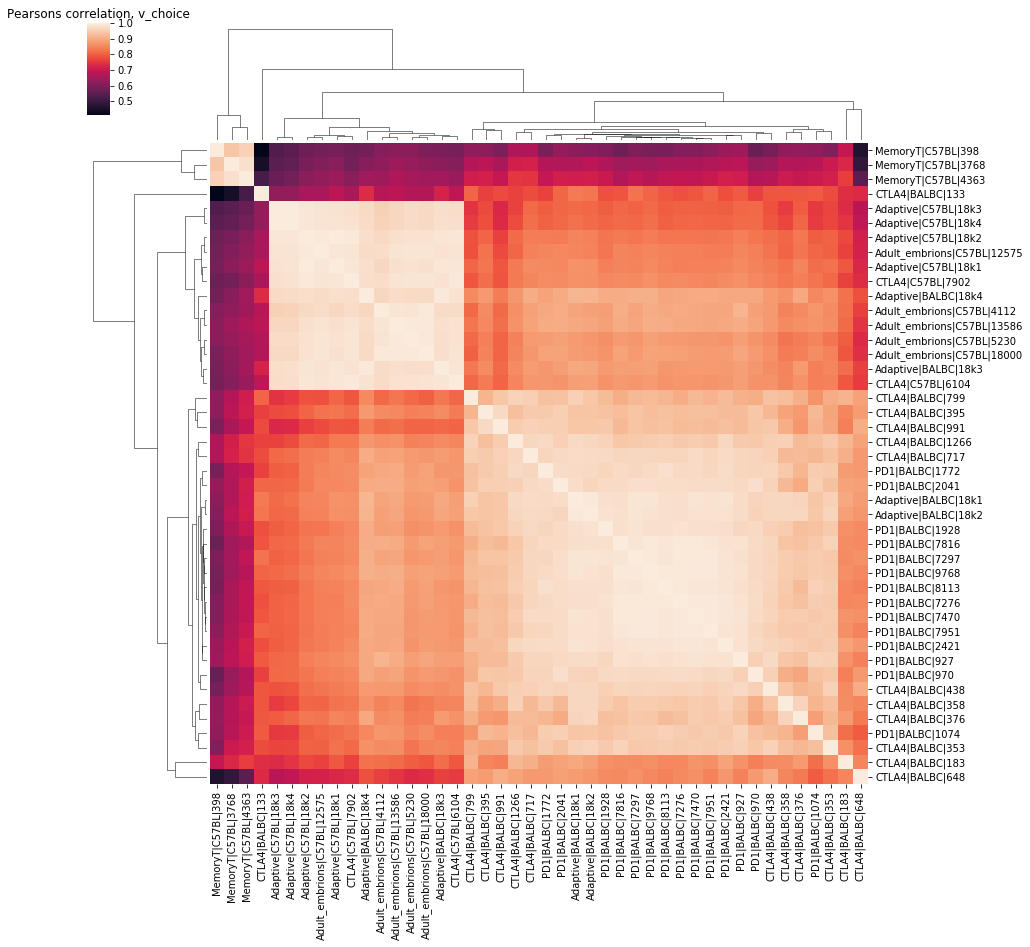

In [225]:
### plot hierarchical clustermap for all probabilities of v-choice rec event
sns.clustermap(Multi_1.combine_event_results('v_choice', alias=True).corr(), figsize=(14,14))
plt.title(f'Pearsons correlation, v_choice') 

We can see that while V-choice had rather clear boundary between mostly C57BL and BALBC samples, 
j-marginals (IGOR's termin) are distributed mostly normally. 
Still showed in the top of a plot 3 samples from a proejct on T memory cells are drastically different.
One can hypothesis that the cause of it is a substantial influx of false-out-of framed sequences into
initial subsets used to train IGOR models. Because of mutations In framed sequences could have appeared 
to Adaptives algorithms as Out-of-framed (which we used in this study)

Text(0.5,1,'Pearsons correlation, j_choice')

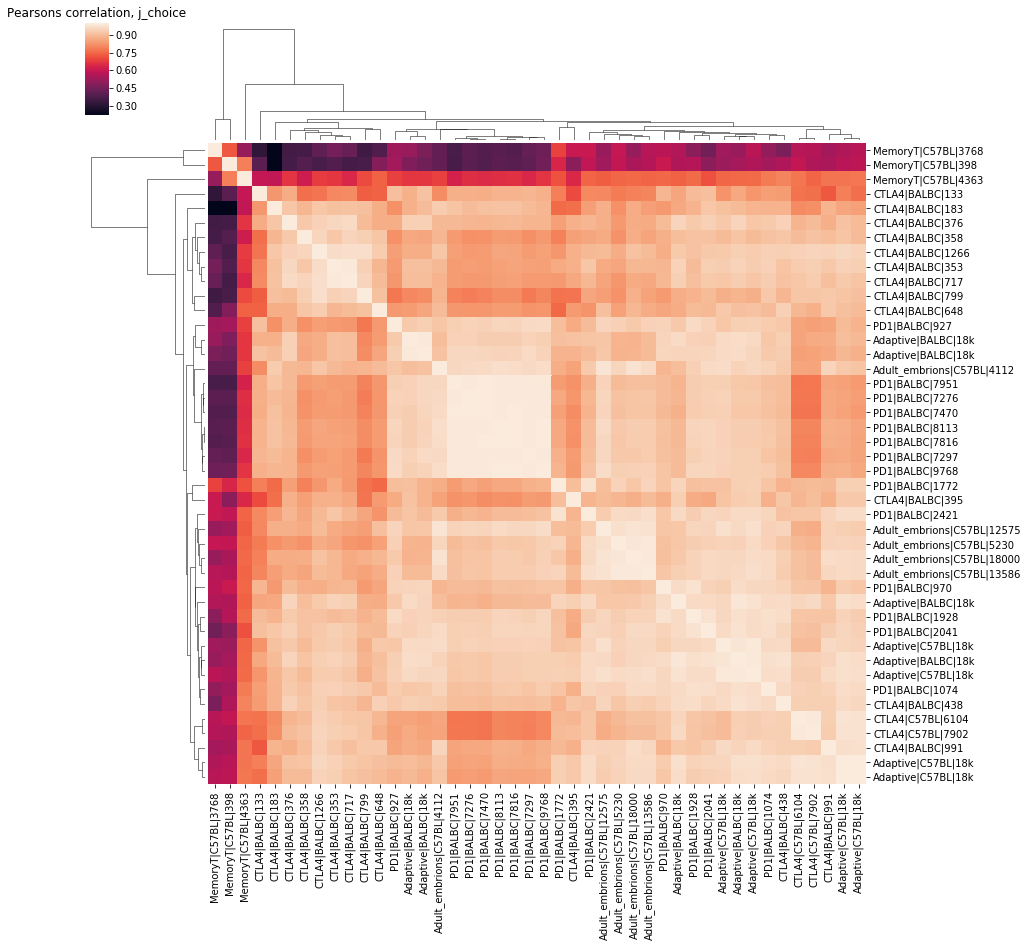

In [9]:
sns.clustermap(Multi_1.combine_event_results('j_choice').corr(), figsize=(14,14))
plt.title(f'Pearsons correlation, j_choice') 

Text(0.5,1,'Pearsons correlation, flatten')

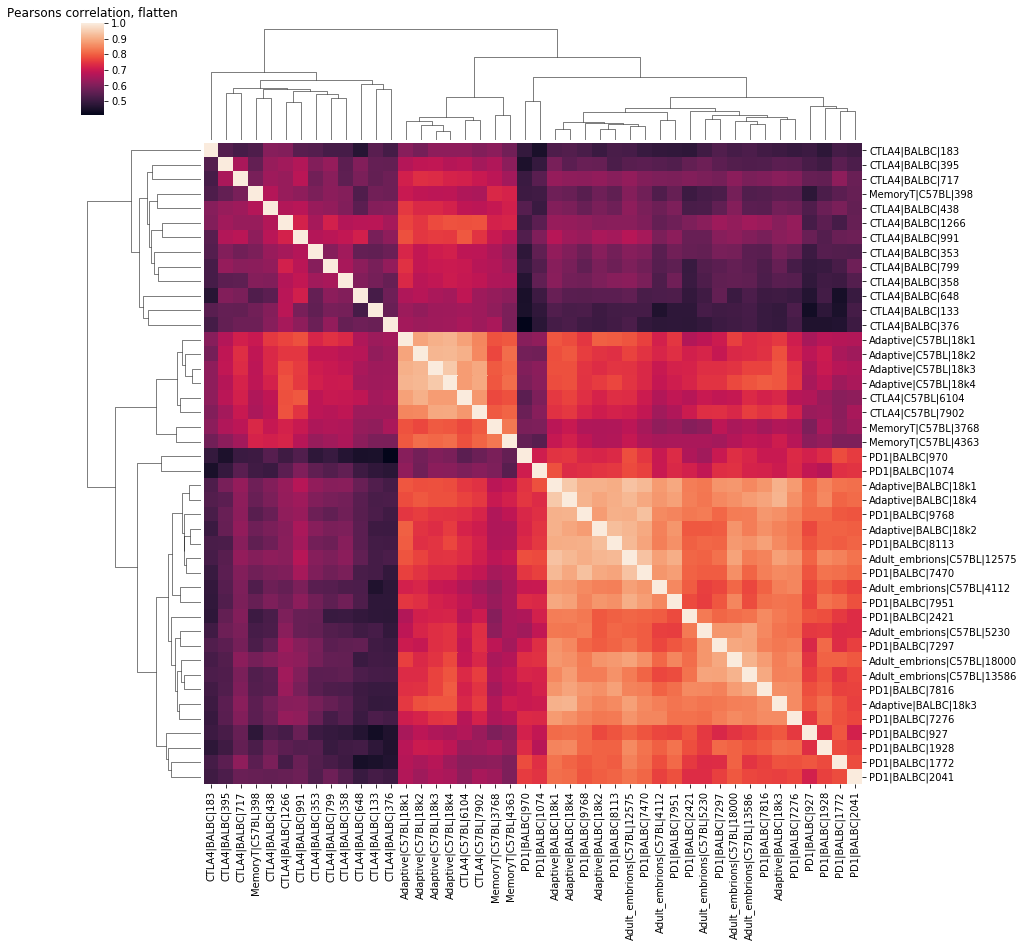

In [64]:
### Flatten object carrying flattened and concatinated probabilities for all recombination events. 
### because there are quite unstable parameters such as the one for d_5'_deletions illustrated below, 
### it is not very surprisingly that average correlation coefficient is quite low. 
sns.clustermap(Multi_1.combine_event_results('flatten').corr(), figsize=(14,14))
plt.title(f'Pearsons correlation, flatten') 

### Access single model from Multi project

In [6]:
print(Multi_1.project_names)
print(Multi_1.projects['PD1_BALBC']['res'].batches)

['project_mouse_2', 'project_mouse_3', 'PD1_BALBC', 'project_mouse_memoryT', 'Immunized']
{'BALBC': ['SD87_T1_4-2_Out_1928', 'SD87_T1_4-5_Out_1772', 'SD87_T1_3-10_Out_970', 'SD87_T1_4-6_Out_2041', 'SD87_TP1_1-8_Out_7276', 'SD87_TP1_4-10_Out_9768', 'SD87_TP1_3-4_Out_7816', 'SD87_T1_3-13_Out_2421', 'SD87_TP1_2-13_Out_8113', 'SD87_TP1_4-11_Out_7951', 'SD87_T1_4-11_Out_1074', 'SD87_T1_3-4_Out_927', 'SD87_TP1_2-1_Out_7297', 'SD87_TP1_2-12_Out_7470']}


In [7]:
### dump model for single batche as json object, so it can be interrogagted by other software and using 
### other programming languages
Multi_1.projects['PD1_BALBC']['res'].select_model('SD87_TP1_4-10_Out_9768')
Multi_1.projects['PD1_BALBC']['res'].save_selection()

dict_keys([])
storing Model SD87_TP1_4-10_Out_9768 on work table


In [8]:
# we can dump the whole MultiModel object as well (only in binary though)
# pickle.dump(Multi_1, open('ALL_MODELS_DUMP', 'wb'))

In [10]:
### list batches for a project
Multi_1.projects['PD1_BALBC']['res'].batches

{'BALBC': ['SD87_T1_4-2_Out_1928',
  'SD87_T1_4-5_Out_1772',
  'SD87_T1_3-10_Out_970',
  'SD87_T1_4-6_Out_2041',
  'SD87_TP1_1-8_Out_7276',
  'SD87_TP1_4-10_Out_9768',
  'SD87_TP1_3-4_Out_7816',
  'SD87_T1_3-13_Out_2421',
  'SD87_TP1_2-13_Out_8113',
  'SD87_TP1_4-11_Out_7951',
  'SD87_T1_4-11_Out_1074',
  'SD87_T1_3-4_Out_927',
  'SD87_TP1_2-1_Out_7297',
  'SD87_TP1_2-12_Out_7470']}

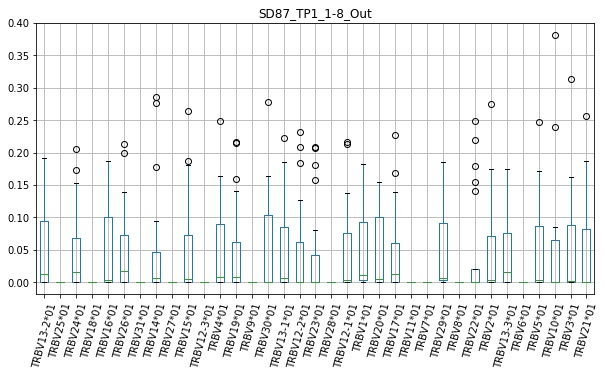

In [12]:
Multi_1.projects['PD1_BALBC']['res'].plot_single('v_3_del', 'SD87_TP1_1-8_Out')

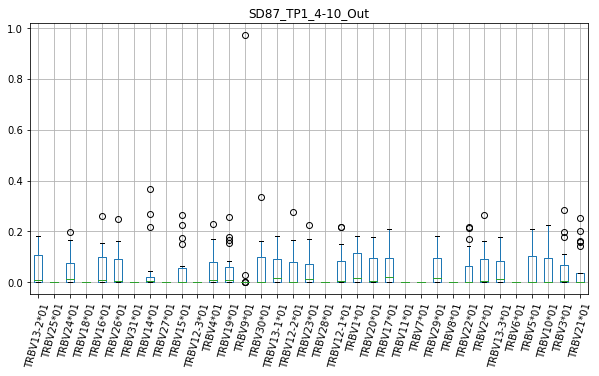

In [13]:
Multi_1.projects['PD1_BALBC']['res'].plot_single('v_3_del', 'SD87_TP1_4-10_Out')

### Prediction of mouse line by learning VDJ parameters

In [81]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

In [234]:
def encode_species(X):
    s = [re.findall('BALB_C|BALBC|C57BL', ind)[0] for ind in X.columns]
    s = ['BALBC']*4+ s[4:]
    X = X.T
    X['Species'] = s
    X = X.replace({'BALBC':0, 'C57BL':1})
    return X

In [78]:
def encode_study(X):
    s = [x.split('|')[0] for x in X.columns]
    X = X.T
    X['Study'] = s
    X = X.replace(replace_study)
    return X

In [119]:
def predict_murine_lines(X):
    X = encode_study(X)
    X= X.loc[:, (X != 0).any(axis=0)]
    X=shuffle(X)
    X_train, X_test, y_train, y_test = X.iloc[:8,:-1], X.iloc[8:,:-1],  X.iloc[:8,-1], X.iloc[8:,-1],
    
    models = {'ExtraTrees': ExtraTreesClassifier(n_estimators=100),}
            #   'SVM': svm.SVC(C=1, kernel='poly'), 'Boosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=5),
            #  'KNs': KNeighborsClassifier(n_neighbors=3)}
    for k, model in models.items():
        model.fit(X_train, y_train)

        acc_score = accuracy_score( model.predict(X_test),y_test.values)
      #  precision_sc = precision_score(model.predict(X_test), y_test.values)

        print(f'{k}: accuracy score: {acc_score}')
     #   print(f'{k}: precision_score: {precision_sc}')

In [88]:
### Select Train subset from main project from Adaptive with abundancy of sequecnes in each sample
### and test subsets with all other samples from other projects
predict_murine_lines(Multi_1.combine_event_results('v_choice'))

ExtraTrees: accuracy score: 0.0


In [74]:
### Select Train subset from main project from Adaptive with abundancy of sequecnes in each sample
### and test subsets with all other samples from other projects
predict_murine_lines(Multi_1.combine_event_results('j_choice'))

ExtraTrees: accuracy score: 0.5833333333333334
ExtraTrees: precision_score: 0.7
SVM: accuracy score: 0.6388888888888888
SVM: precision_score: 0.9
Boosting: accuracy score: 0.6111111111111112
Boosting: precision_score: 0.9
KNs: accuracy score: 0.7222222222222222
KNs: precision_score: 0.9


In [126]:
J = Multi_1.combine_event_results('j_choice')
V = Multi_1.combine_event_results('v_choice')
D = Multi_1.combine_event_results('direct_d_gene')
### We notice that while V segment allows to achive high accuracy - J (and D) control false positive rate - precision 
### is close to 1. By concatenation of V,D,J metrics together we achive good avg precision scores with decent accuracy
predict_murine_lines(  pd.concat( [V,D,J]))

ExtraTrees: accuracy score: 0.8888888888888888
ExtraTrees: precision_score: 0.9
SVM: accuracy score: 0.5833333333333334
SVM: precision_score: 1.0
Boosting: accuracy score: 0.8055555555555556
Boosting: precision_score: 0.9
KNs: accuracy score: 0.8333333333333334
KNs: precision_score: 1.0


In [117]:
### Projects also include parameter containing flattened and aggregated data (for a given list of attributes)
### surprisingly, species classification with arrays, containing all flattened parameters appear to be significantly
### worse in murine Line classification task. 
## Maybe such parameters as number of deletions and Markov chain's coefficients reflect deliniage separation better.
predict_murine_lines(Multi_1.combine_event_results('flatten'))

ExtraTrees: accuracy score: 0.5277777777777778
ExtraTrees: precision_score: 0.5
SVM: accuracy score: 0.5277777777777778
SVM: precision_score: 0.5
Boosting: accuracy score: 0.5277777777777778
Boosting: precision_score: 0.5
KNs: accuracy score: 0.5277777777777778
KNs: precision_score: 0.5


In [131]:
### Function to store in 'Flatten' attribute aggragated list of probabilities from Recombination events of interest
#### By default 'flatten' contains all probabilities
Multi_1.run_all( lambda x: x.make_flattened(('v_choice' ,'j_choice', 'v_3_del', 'j_5_del',)))

In [132]:
### Select Train subset from main project from Adaptive with abundancy of sequecnes in each sample
### and test subsets with all other samples from other projects
predict_murine_lines(Multi_1.combine_event_results('flatten'))

ExtraTrees: accuracy score: 0.6944444444444444


### Clustering on pca and mds 

In [6]:
from sklearn import manifold
def make_mds(corr_chr):
    model =  manifold.MDS(n_components=2, n_init=15, eps=10e-4, dissimilarity='precomputed', random_state=1)
    out = model.fit_transform(corr_chr)
    return pd.DataFrame(out, index=corr_chr.index, columns=['mds1', 'mds2'])

def plot_scatter(mds_out):
    out, label  = mds_out.values, mds_out.index
    fig, ax = plt.subplots()
    plt.scatter(out[:, 0], out[:, 1], )
    for i, l in enumerate(label):
            ax.annotate(l, (out[i, 0], out[i, 1]))

def plot_pcX(PcX, dims, name, n=2,  key=None, key_col='PC'):
    g = sns.FacetGrid(PcX, size=4,  hue=key,)
    g = (g.map(plt.scatter, key_col+"{}".format(1), key_col+"{}".format(2), edgecolor="w", alpha=0.99, s=90,).add_legend())
    plt.title(name)
    plt.show()

In [39]:
def add_targets(c2, name='Line', t=1):
    c2[name]=[x.replace('-','|').split('|')[t] for x in c2.index]
    return c2

In [40]:
def plot_mds_for_event(event='v_choice', jsd=True):
    c = Multi_1.combine_event_results(event)
    if jsd: 
        c2 = make_mds( Multi_1.Test_project.compute_pairwise_distance( c ))
    else:
        c2 = make_mds( 1-c.corr() )
    c2 = add_targets(c2, t=0)
    return c2
   # plot_pcX(c2, 1, event, key='Line', key_col='mds')

In [14]:
labels = ['v_choice', 'j_choice', 'v_3_del', 'd_5_del', 
          'd_3_del', 'j_5_del', 'vd_ins', 'vd_dinucl', 'dj_ins', 'dj_dinucl', 'flatten']

In [69]:
cmap=plt.cm.get_cmap('viridis', 5)

In [20]:
import matplotlib.patches as mpatches
from sklearn.svm import SVC

In [52]:
replace_study=OrderedDict(dict(zip(['Adaptive', 'Adult_embrions', 'PD1', 'MemoryT', 'CTLA4'], range(0,6))))

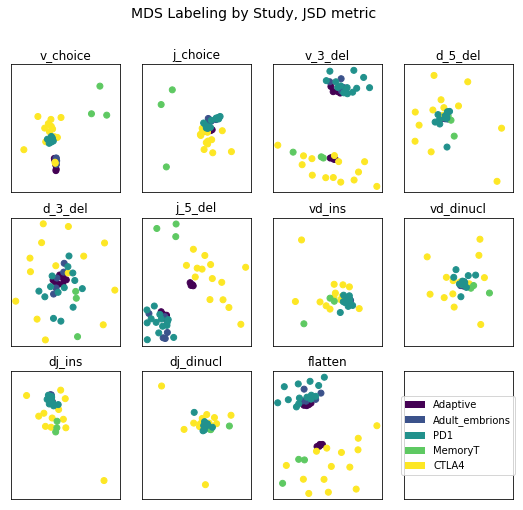

In [73]:
fig, ax = plt.subplots(3, 4, figsize=(9,8), subplot_kw=dict(xticks=[], yticks=[]))
#labels = RES_mouse_project2.events_probs.keys()
for eve, axi in zip( labels , ax.flat):
    c2 = plot_mds_for_event(event=eve)
    c2= c2.replace(replace_study)
    model = SVC(kernel='rbf', C=12, )
    axi.scatter( c2.values[:, 0], c2.values[:, 1], c=c2['Line'])
    model.fit(c2.iloc[:,:-1], c2.iloc[:,-1])
#     plot_svc_decision_function(model, ax=axi)
    axi.set_title(eve)
recs = []
for i in range(0,5):
    recs.append(mpatches.Rectangle((0,0),0.8,0.8,fc=[cmap(i) for i in range(0,5)][i],))
plt.legend(recs, replace_study.keys(), loc=10)

plt.suptitle('MDS Labeling by Study, JSD metric', fontsize=14)
plt.savefig('/home/lunar/Desktop/IgoR_crawling/Pictures/MANY_MDS_with_rbf_kernel_Tissues_JSD.png', dpi=360)

In [28]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 300)
    y = np.linspace(ylim[0], ylim[1], 300)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-0.9, 0, 0.9], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

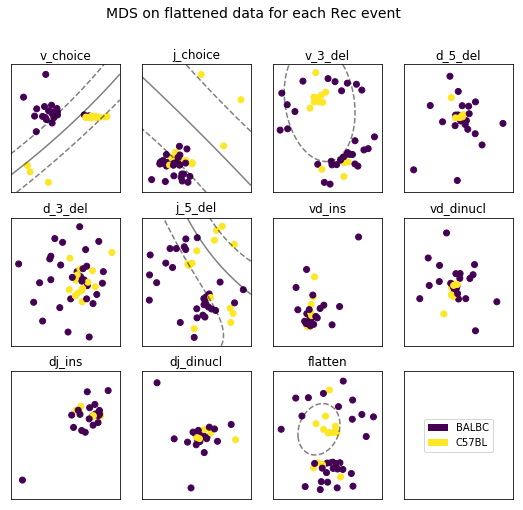

In [34]:
fig, ax = plt.subplots(3, 4, figsize=(9,8), subplot_kw=dict(xticks=[], yticks=[]))
#labels = RES_mouse_project2.events_probs.keys()
for eve, axi in zip( labels , ax.flat):
    c2 = plot_mds_for_event(event=eve, jsd=False)
    c2= c2.replace({'BALBC':0, 'C57BL':1})
    model = SVC(kernel='rbf', C=12, )
    axi.scatter( c2.values[:, 0], c2.values[:, 1], c=c2['Line'])
    model.fit(c2.iloc[:,:-1], c2.iloc[:,-1])
    plot_svc_decision_function(model, ax=axi)
    axi.set_title(eve)
recs = []
for i in range(0,2):
    recs.append(mpatches.Rectangle((0,0),0.8,0.8,fc=[cmap(i) for i in [0,1,]][i],))
plt.legend(recs, ['BALBC', 'C57BL'], loc=10)

plt.suptitle('MDS Labeling by Study', fontsize=14)
plt.savefig('/home/lunar/Desktop/IgoR_crawling/Pictures/MANY_MDS_with_rbf_kernel_Tissues.png', dpi=360)

### Same but in using jsd metrics and with coordinates

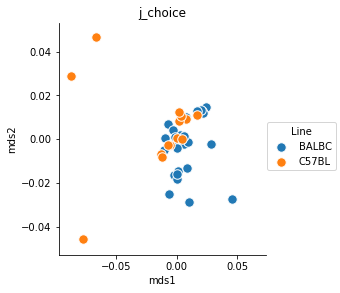

In [26]:
plot_mds_for_event('j_choice')

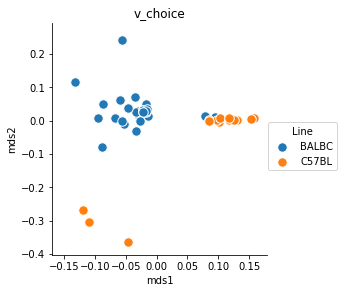

In [30]:
plot_mds_for_event('v_choice', jsd=False)

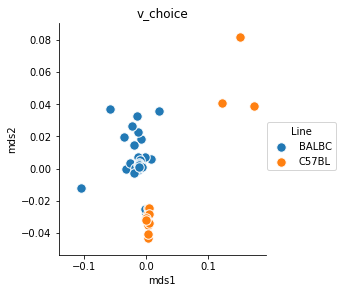

In [13]:
plot_mds_for_event('v_choice')

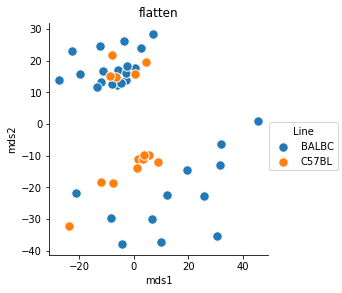

In [15]:
### here flatten carries all events
plot_mds_for_event('flatten')

### Clustering

In [208]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from scipy.stats import mode


def make_clustering(Multi_1=Multi_1, event_type='v_choice'):
    X = make_mds( Multi_1.Test_project.compute_pairwise_distance( Multi_1.combine_event_results(event_type) ))
    X = add_targets(X, t=0)
    X = X.replace(replace_study)

    model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                               assign_labels='kmeans')
    clusters = model.fit_predict(X.iloc[:,:-1])
    plt.scatter(X.values[:, 0], X.values[:, 1], c=clusters,
                s=50);
    

    labels = np.zeros_like(clusters)
    for i in range(5):
        mask = (clusters == i)
        labels[mask] = mode(X.iloc[:,-1][mask])[0]
    
    acc_sc = accuracy_score(X.iloc[:,-1], labels)
    mat = confusion_matrix(X.iloc[:,-1], labels)
    sns.heatmap(mat.T, square=True, annot=True, yticklabels=replace_study.keys(),
                fmt='d', cbar=False,)
    #             xticklabels=digits.target_names,
    #             yticklabels=digits.target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.title(f'Multiclass for studies, combined gene choices and deletions, accuracy: {acc_sc}')
    
    print(f'{event_type}: accuracy_score: {acc_sc}')
#    return labels

In [209]:
## Handy way to compare labels from clusters with actual labels, here coming from dataset named digits
## we simply use mask to select values belonging to cluster i in labels from k_means and 
### MODAL VALUE of targets belonging to this cluster i from digits dataset! 
## mode here returns most common value - we assume that our clustering 'classification' is good enough

In [219]:
Multi_1.run_all( lambda x: x.make_flattened(('v_choice' ,'j_choice', 'v_3_del', 'j_5_del','d_5_del')))

flatten: accuracy_score: 0.6818181818181818


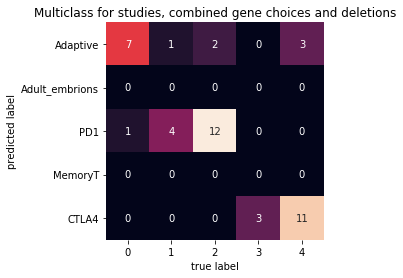

In [191]:
### Accuracy for clustering on MDS using only V-choice
make_clustering(event_type='flatten')

v_choice: accuracy_score: 0.5454545454545454


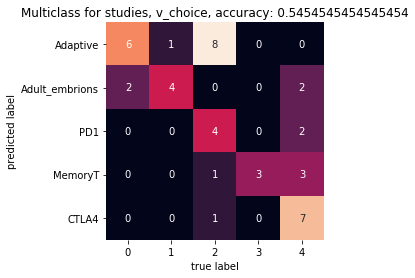

In [205]:
### Accuracy for clustering on MDS using only V-choice
make_clustering(event_type='v_choice')

vd_dinucl: accuracy_score: 0.6818181818181818


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

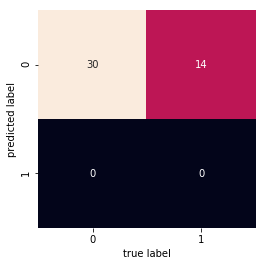

In [63]:
### Accuracy for clustering Strains on MDS using only vd_dinucl is not working already!
make_clustering(event_type='vd_dinucl')

### Output single model

In [44]:
print(Multi_1.project_names)
print(Multi_1.projects['PD1_BALBC']['res'].batches)
Multi_1.projects['PD1_BALBC']['res'].select_model('SD87_TP1_4-10_Out_9768')

Multi_1.projects['PD1_BALBC']['res'].save_selection()

['project_mouse_2', 'project_mouse_3', 'PD1_BALBC', 'project_mouse_memoryT', 'Immunized']
{'BALBC': ['SD87_T1_4-2_Out_1928', 'SD87_T1_4-5_Out_1772', 'SD87_T1_3-10_Out_970', 'SD87_T1_4-6_Out_2041', 'SD87_TP1_1-8_Out_7276', 'SD87_TP1_4-10_Out_9768', 'SD87_TP1_3-4_Out_7816', 'SD87_T1_3-13_Out_2421', 'SD87_TP1_2-13_Out_8113', 'SD87_TP1_4-11_Out_7951', 'SD87_T1_4-11_Out_1074', 'SD87_T1_3-4_Out_927', 'SD87_TP1_2-1_Out_7297', 'SD87_TP1_2-12_Out_7470']}
dict_keys([])
storing Model SD87_TP1_4-10_Out_9768 on work table
